In [1]:
!pip install -qq transformers

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 895 kB 58.6 MB/s 
     |████████████████████████████████| 6.5 MB 67.3 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 74.8 MB/s 


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 4.3 MB/s 


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 144 kB 49.6 MB/s 
     |████████████████████████████████| 181 kB 51.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=b9b4d0932ff9d3862f7cd5126cafd03f4bf3ec55b98f67461000755b00584316
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup, RobertaForSequenceClassification, BertForSequenceClassification,DistilBertModel, DistilBertTokenizer,DistilBertForSequenceClassification,XLNetTokenizer, XLNetModel,XLNetForSequenceClassification, ElectraTokenizer, ElectraForSequenceClassification,RobertaTokenizer, TFRobertaModel


import torch
import re
import numpy as np
import pandas as pd

import seaborn as sns

from pylab import rcParams

import matplotlib.pyplot as plt

from matplotlib import rc

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict

from textwrap import wrap

from torch import nn, optim

from torch.utils.data import Dataset, DataLoader

In [3]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer.add_tokens(['🌃', '😿', '🏃', '🍭', '💤', '👏', '😅', '💯', '👍', '💀', '🍵', '🔄', '🏄', '®', '🍦', '✋', '💧', '🙈', '🐇', '📨', '💟', '🔥', '💳', '🔆', '😯', '🐧', '🌻', '❤', '👑', '😹', '😣', '😴', '🍬', '🍉', '✊', '💽', '👄', '☠', '🔮', '🐷', '🆘', '😕', '❄', '🌅', '🚢', '😁', '✖️', '☺️', '💥', '🐳', '💄', '🇫🇷', '😓', '⛄', '🏥', '🍋', '🍧', '🎾', '💖', '☺', '🌱', '☀️', '🏈', '🇬🇧', '🕑', '✈️', '▶', '💆', '💦', '✏', '😪', '😋', '💉', '😜', '🇩🇪', '⭐', '🎸', '😱', '👪', '😘', '👶', '👫', '💼', '👃', '💛', '🌊', '🎅', '🌸', '🎌', '🔫', '😡', '🌎', '👅', '👸', '😛', '👣', '🐾', '🎁', '🚔', '🍖', '🚨', '😻', '👯', '🍷', '❤️', '🌾', '😆', '✴', '🎥', '💙', '😖', '👊', '♥️', '😃', '💔', '✖', '❗', '🌁', '💚', '🎋', '💸', '☹', '📀', '👋', '💃', '©', '🐰', '📓', '✨', '🐉', '🌆', '🎂', '👈', '🚗', '😳', '🙀', '😨', '💞', '🍤', '👻', '☮', '🍈', '👜', '📯', '🍺', '😐', '🚴', '👂', '☝️', '🙆', '😩', '🐼', '🎎', '👌', '🙏', '🍰', '😏', '😑', '☁', '◽', '👐', '🍗', '🎹', '🍃', '⬅️', '😙', '♏', '⛅', '🚓', '🍊', '🇮🇹', '📖', '🌵', '◾', '🍨', '👱', '👰', '🇺🇸', '💍', '🐴', '💕', '🎈', '🍸', '🎄', '👎', '😤', '😷', '💘', '😊', '💁', '🎤', '🏡', '🔞', '🎮', '⁉️', '🎷', '😌', '🎓', '😰', '🌏', '🍁', '🐥', '🌴', '💌', '😍', '😽', '👬', '👔', '😶', '🍻', '😥', '🎼', '🐒', '🆒', '☁️', '📱', '💊', '🐶', '🎉', '🌍', '😞', '☂', '👾', '🎵', '🌠', '🍔', '🍲', '🕐', '🍩', '🍏', '♥', '💪', '🍟', '🐤', '🍹', '😀', '💵', '🏰', '🎀', '🐬', '💢', '🎻', '🌀', '😬', '✔️', '😝', '🌌', '👹', '🐣', '▪', '🎨', '💋', '☀', '⚡', '🍆', '🍛', '🌚', '😮', '🍝', '☕', '🍓', '👀', '😠', '🚶', '👉', '🍕', '😈', '😂', '💰', '🍳', '🎆', '🐭', '📺', '🎶', '🎭', '🏂', '📑', '🎊', '🍀', '☔', '🕥', '⏰', '💏', '🙍', '👿', '😉', '😗', '🍍', '😧', '👩', '🐽', '🎿', '🐸', '😎', '🌲', '😫', '😔', '👙', '💗', '💂', '☃', '💩', '👆', '😲', '🚀', '✌', '😇', '🚼', '🌂', '🍠', '〰', '📄', '🍫', '😺', '😢', '🐠', '🔪', '🔯', '💐', '🚺', '🔅', '🏊', '😚', '❌', '💅', '😵', '✌️', '🚙', '😟', '🙅', '👳', '™', '⚽', '♦', '💻', '⛪', '💣', '🚫', '🍅', '🙋', '📣', '👠', '🍪', '🎧', '✈', '🙌', '🙊', '📚', '❄️', '🚬', '💜', '😭', '😄', '🌙', '🙉', '🐛', '👼', '💝', '😒', '🌞', '💨', '🌽', '😦', '🐟', '💎', '👭', '🎺', '➡️'])

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

362

In [26]:
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
tokenizer.add_tokens(['🌃', '😿', '🏃', '🍭', '💤', '👏', '😅', '💯', '👍', '💀', '🍵', '🔄', '🏄', '®', '🍦', '✋', '💧', '🙈', '🐇', '📨', '💟', '🔥', '💳', '🔆', '😯', '🐧', '🌻', '❤', '👑', '😹', '😣', '😴', '🍬', '🍉', '✊', '💽', '👄', '☠', '🔮', '🐷', '🆘', '😕', '❄', '🌅', '🚢', '😁', '✖️', '☺️', '💥', '🐳', '💄', '🇫🇷', '😓', '⛄', '🏥', '🍋', '🍧', '🎾', '💖', '☺', '🌱', '☀️', '🏈', '🇬🇧', '🕑', '✈️', '▶', '💆', '💦', '✏', '😪', '😋', '💉', '😜', '🇩🇪', '⭐', '🎸', '😱', '👪', '😘', '👶', '👫', '💼', '👃', '💛', '🌊', '🎅', '🌸', '🎌', '🔫', '😡', '🌎', '👅', '👸', '😛', '👣', '🐾', '🎁', '🚔', '🍖', '🚨', '😻', '👯', '🍷', '❤️', '🌾', '😆', '✴', '🎥', '💙', '😖', '👊', '♥️', '😃', '💔', '✖', '❗', '🌁', '💚', '🎋', '💸', '☹', '📀', '👋', '💃', '©', '🐰', '📓', '✨', '🐉', '🌆', '🎂', '👈', '🚗', '😳', '🙀', '😨', '💞', '🍤', '👻', '☮', '🍈', '👜', '📯', '🍺', '😐', '🚴', '👂', '☝️', '🙆', '😩', '🐼', '🎎', '👌', '🙏', '🍰', '😏', '😑', '☁', '◽', '👐', '🍗', '🎹', '🍃', '⬅️', '😙', '♏', '⛅', '🚓', '🍊', '🇮🇹', '📖', '🌵', '◾', '🍨', '👱', '👰', '🇺🇸', '💍', '🐴', '💕', '🎈', '🍸', '🎄', '👎', '😤', '😷', '💘', '😊', '💁', '🎤', '🏡', '🔞', '🎮', '⁉️', '🎷', '😌', '🎓', '😰', '🌏', '🍁', '🐥', '🌴', '💌', '😍', '😽', '👬', '👔', '😶', '🍻', '😥', '🎼', '🐒', '🆒', '☁️', '📱', '💊', '🐶', '🎉', '🌍', '😞', '☂', '👾', '🎵', '🌠', '🍔', '🍲', '🕐', '🍩', '🍏', '♥', '💪', '🍟', '🐤', '🍹', '😀', '💵', '🏰', '🎀', '🐬', '💢', '🎻', '🌀', '😬', '✔️', '😝', '🌌', '👹', '🐣', '▪', '🎨', '💋', '☀', '⚡', '🍆', '🍛', '🌚', '😮', '🍝', '☕', '🍓', '👀', '😠', '🚶', '👉', '🍕', '😈', '😂', '💰', '🍳', '🎆', '🐭', '📺', '🎶', '🎭', '🏂', '📑', '🎊', '🍀', '☔', '🕥', '⏰', '💏', '🙍', '👿', '😉', '😗', '🍍', '😧', '👩', '🐽', '🎿', '🐸', '😎', '🌲', '😫', '😔', '👙', '💗', '💂', '☃', '💩', '👆', '😲', '🚀', '✌', '😇', '🚼', '🌂', '🍠', '〰', '📄', '🍫', '😺', '😢', '🐠', '🔪', '🔯', '💐', '🚺', '🔅', '🏊', '😚', '❌', '💅', '😵', '✌️', '🚙', '😟', '🙅', '👳', '™', '⚽', '♦', '💻', '⛪', '💣', '🚫', '🍅', '🙋', '📣', '👠', '🍪', '🎧', '✈', '🙌', '🙊', '📚', '❄️', '🚬', '💜', '😭', '😄', '🌙', '🙉', '🐛', '👼', '💝', '😒', '🌞', '💨', '🌽', '😦', '🐟', '💎', '👭', '🎺', '➡️'])

https://huggingface.co/google/electra-base-discriminator/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpfoi2oyk4


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/google/electra-base-discriminator/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/fe616facc71d8e3afc69de3edac76bf1e4a0a741e80d9a99a2cc6a9a8f5f74b5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/fe616facc71d8e3afc69de3edac76bf1e4a0a741e80d9a99a2cc6a9a8f5f74b5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/google/electra-base-discriminator/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpjvkbwae9


Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

storing https://huggingface.co/google/electra-base-discriminator/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/6f8b3f5095b6f44f5c75cee3c56b971b3208b08132ba2f9fb775a4a7b7140942.4f2213f5603276adf12967b32e4444c0f187f34ca4f8b22a65f03e13514589e9
creating metadata file for /root/.cache/huggingface/transformers/6f8b3f5095b6f44f5c75cee3c56b971b3208b08132ba2f9fb775a4a7b7140942.4f2213f5603276adf12967b32e4444c0f187f34ca4f8b22a65f03e13514589e9
loading file https://huggingface.co/google/electra-base-discriminator/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/fe616facc71d8e3afc69de3edac76bf1e4a0a741e80d9a99a2cc6a9a8f5f74b5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/google/electra-base-discriminator/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/google/electra-base-discriminator/resolve/main/special_tokens_map.json from cache at None
load

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

storing https://huggingface.co/google/electra-base-discriminator/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/7d1569a4df2372d67341bda716bce4e3edf3e3ffadb97251bc4b6b35d459f624.57c13443a51769ce892714c93bb3ee3952bad66d7d9662d9de382b808377c3f8
creating metadata file for /root/.cache/huggingface/transformers/7d1569a4df2372d67341bda716bce4e3edf3e3ffadb97251bc4b6b35d459f624.57c13443a51769ce892714c93bb3ee3952bad66d7d9662d9de382b808377c3f8
loading configuration file https://huggingface.co/google/electra-base-discriminator/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/7d1569a4df2372d67341bda716bce4e3edf3e3ffadb97251bc4b6b35d459f624.57c13443a51769ce892714c93bb3ee3952bad66d7d9662d9de382b808377c3f8
Model config ElectraConfig {
  "_name_or_path": "google/electra-base-discriminator",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_a

362

In [39]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer.add_tokens(['🌃', '😿', '🏃', '🍭', '💤', '👏', '😅', '💯', '👍', '💀', '🍵', '🔄', '🏄', '®', '🍦', '✋', '💧', '🙈', '🐇', '📨', '💟', '🔥', '💳', '🔆', '😯', '🐧', '🌻', '❤', '👑', '😹', '😣', '😴', '🍬', '🍉', '✊', '💽', '👄', '☠', '🔮', '🐷', '🆘', '😕', '❄', '🌅', '🚢', '😁', '✖️', '☺️', '💥', '🐳', '💄', '🇫🇷', '😓', '⛄', '🏥', '🍋', '🍧', '🎾', '💖', '☺', '🌱', '☀️', '🏈', '🇬🇧', '🕑', '✈️', '▶', '💆', '💦', '✏', '😪', '😋', '💉', '😜', '🇩🇪', '⭐', '🎸', '😱', '👪', '😘', '👶', '👫', '💼', '👃', '💛', '🌊', '🎅', '🌸', '🎌', '🔫', '😡', '🌎', '👅', '👸', '😛', '👣', '🐾', '🎁', '🚔', '🍖', '🚨', '😻', '👯', '🍷', '❤️', '🌾', '😆', '✴', '🎥', '💙', '😖', '👊', '♥️', '😃', '💔', '✖', '❗', '🌁', '💚', '🎋', '💸', '☹', '📀', '👋', '💃', '©', '🐰', '📓', '✨', '🐉', '🌆', '🎂', '👈', '🚗', '😳', '🙀', '😨', '💞', '🍤', '👻', '☮', '🍈', '👜', '📯', '🍺', '😐', '🚴', '👂', '☝️', '🙆', '😩', '🐼', '🎎', '👌', '🙏', '🍰', '😏', '😑', '☁', '◽', '👐', '🍗', '🎹', '🍃', '⬅️', '😙', '♏', '⛅', '🚓', '🍊', '🇮🇹', '📖', '🌵', '◾', '🍨', '👱', '👰', '🇺🇸', '💍', '🐴', '💕', '🎈', '🍸', '🎄', '👎', '😤', '😷', '💘', '😊', '💁', '🎤', '🏡', '🔞', '🎮', '⁉️', '🎷', '😌', '🎓', '😰', '🌏', '🍁', '🐥', '🌴', '💌', '😍', '😽', '👬', '👔', '😶', '🍻', '😥', '🎼', '🐒', '🆒', '☁️', '📱', '💊', '🐶', '🎉', '🌍', '😞', '☂', '👾', '🎵', '🌠', '🍔', '🍲', '🕐', '🍩', '🍏', '♥', '💪', '🍟', '🐤', '🍹', '😀', '💵', '🏰', '🎀', '🐬', '💢', '🎻', '🌀', '😬', '✔️', '😝', '🌌', '👹', '🐣', '▪', '🎨', '💋', '☀', '⚡', '🍆', '🍛', '🌚', '😮', '🍝', '☕', '🍓', '👀', '😠', '🚶', '👉', '🍕', '😈', '😂', '💰', '🍳', '🎆', '🐭', '📺', '🎶', '🎭', '🏂', '📑', '🎊', '🍀', '☔', '🕥', '⏰', '💏', '🙍', '👿', '😉', '😗', '🍍', '😧', '👩', '🐽', '🎿', '🐸', '😎', '🌲', '😫', '😔', '👙', '💗', '💂', '☃', '💩', '👆', '😲', '🚀', '✌', '😇', '🚼', '🌂', '🍠', '〰', '📄', '🍫', '😺', '😢', '🐠', '🔪', '🔯', '💐', '🚺', '🔅', '🏊', '😚', '❌', '💅', '😵', '✌️', '🚙', '😟', '🙅', '👳', '™', '⚽', '♦', '💻', '⛪', '💣', '🚫', '🍅', '🙋', '📣', '👠', '🍪', '🎧', '✈', '🙌', '🙊', '📚', '❄️', '🚬', '💜', '😭', '😄', '🌙', '🙉', '🐛', '👼', '💝', '😒', '🌞', '💨', '🌽', '😦', '🐟', '💎', '👭', '🎺', '➡️'])

https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp7lqkhj20


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpq1s3e3_n


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbe

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.0

362

In [51]:
!pip install sentencepiece



     |████████████████████████████████| 1.2 MB 7.1 MB/s 


In [4]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
tokenizer.add_tokens(['🌃', '😿', '🏃', '🍭', '💤', '👏', '😅', '💯', '👍', '💀', '🍵', '🔄', '🏄', '®', '🍦', '✋', '💧', '🙈', '🐇', '📨', '💟', '🔥', '💳', '🔆', '😯', '🐧', '🌻', '❤', '👑', '😹', '😣', '😴', '🍬', '🍉', '✊', '💽', '👄', '☠', '🔮', '🐷', '🆘', '😕', '❄', '🌅', '🚢', '😁', '✖️', '☺️', '💥', '🐳', '💄', '🇫🇷', '😓', '⛄', '🏥', '🍋', '🍧', '🎾', '💖', '☺', '🌱', '☀️', '🏈', '🇬🇧', '🕑', '✈️', '▶', '💆', '💦', '✏', '😪', '😋', '💉', '😜', '🇩🇪', '⭐', '🎸', '😱', '👪', '😘', '👶', '👫', '💼', '👃', '💛', '🌊', '🎅', '🌸', '🎌', '🔫', '😡', '🌎', '👅', '👸', '😛', '👣', '🐾', '🎁', '🚔', '🍖', '🚨', '😻', '👯', '🍷', '❤️', '🌾', '😆', '✴', '🎥', '💙', '😖', '👊', '♥️', '😃', '💔', '✖', '❗', '🌁', '💚', '🎋', '💸', '☹', '📀', '👋', '💃', '©', '🐰', '📓', '✨', '🐉', '🌆', '🎂', '👈', '🚗', '😳', '🙀', '😨', '💞', '🍤', '👻', '☮', '🍈', '👜', '📯', '🍺', '😐', '🚴', '👂', '☝️', '🙆', '😩', '🐼', '🎎', '👌', '🙏', '🍰', '😏', '😑', '☁', '◽', '👐', '🍗', '🎹', '🍃', '⬅️', '😙', '♏', '⛅', '🚓', '🍊', '🇮🇹', '📖', '🌵', '◾', '🍨', '👱', '👰', '🇺🇸', '💍', '🐴', '💕', '🎈', '🍸', '🎄', '👎', '😤', '😷', '💘', '😊', '💁', '🎤', '🏡', '🔞', '🎮', '⁉️', '🎷', '😌', '🎓', '😰', '🌏', '🍁', '🐥', '🌴', '💌', '😍', '😽', '👬', '👔', '😶', '🍻', '😥', '🎼', '🐒', '🆒', '☁️', '📱', '💊', '🐶', '🎉', '🌍', '😞', '☂', '👾', '🎵', '🌠', '🍔', '🍲', '🕐', '🍩', '🍏', '♥', '💪', '🍟', '🐤', '🍹', '😀', '💵', '🏰', '🎀', '🐬', '💢', '🎻', '🌀', '😬', '✔️', '😝', '🌌', '👹', '🐣', '▪', '🎨', '💋', '☀', '⚡', '🍆', '🍛', '🌚', '😮', '🍝', '☕', '🍓', '👀', '😠', '🚶', '👉', '🍕', '😈', '😂', '💰', '🍳', '🎆', '🐭', '📺', '🎶', '🎭', '🏂', '📑', '🎊', '🍀', '☔', '🕥', '⏰', '💏', '🙍', '👿', '😉', '😗', '🍍', '😧', '👩', '🐽', '🎿', '🐸', '😎', '🌲', '😫', '😔', '👙', '💗', '💂', '☃', '💩', '👆', '😲', '🚀', '✌', '😇', '🚼', '🌂', '🍠', '〰', '📄', '🍫', '😺', '😢', '🐠', '🔪', '🔯', '💐', '🚺', '🔅', '🏊', '😚', '❌', '💅', '😵', '✌️', '🚙', '😟', '🙅', '👳', '™', '⚽', '♦', '💻', '⛪', '💣', '🚫', '🍅', '🙋', '📣', '👠', '🍪', '🎧', '✈', '🙌', '🙊', '📚', '❄️', '🚬', '💜', '😭', '😄', '🌙', '🙉', '🐛', '👼', '💝', '😒', '🌞', '💨', '🌽', '😦', '🐟', '💎', '👭', '🎺', '➡️'])


Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

368

In [22]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer.add_tokens(['🌃', '😿', '🏃', '🍭', '💤', '👏', '😅', '💯', '👍', '💀', '🍵', '🔄', '🏄', '®', '🍦', '✋', '💧', '🙈', '🐇', '📨', '💟', '🔥', '💳', '🔆', '😯', '🐧', '🌻', '❤', '👑', '😹', '😣', '😴', '🍬', '🍉', '✊', '💽', '👄', '☠', '🔮', '🐷', '🆘', '😕', '❄', '🌅', '🚢', '😁', '✖️', '☺️', '💥', '🐳', '💄', '🇫🇷', '😓', '⛄', '🏥', '🍋', '🍧', '🎾', '💖', '☺', '🌱', '☀️', '🏈', '🇬🇧', '🕑', '✈️', '▶', '💆', '💦', '✏', '😪', '😋', '💉', '😜', '🇩🇪', '⭐', '🎸', '😱', '👪', '😘', '👶', '👫', '💼', '👃', '💛', '🌊', '🎅', '🌸', '🎌', '🔫', '😡', '🌎', '👅', '👸', '😛', '👣', '🐾', '🎁', '🚔', '🍖', '🚨', '😻', '👯', '🍷', '❤️', '🌾', '😆', '✴', '🎥', '💙', '😖', '👊', '♥️', '😃', '💔', '✖', '❗', '🌁', '💚', '🎋', '💸', '☹', '📀', '👋', '💃', '©', '🐰', '📓', '✨', '🐉', '🌆', '🎂', '👈', '🚗', '😳', '🙀', '😨', '💞', '🍤', '👻', '☮', '🍈', '👜', '📯', '🍺', '😐', '🚴', '👂', '☝️', '🙆', '😩', '🐼', '🎎', '👌', '🙏', '🍰', '😏', '😑', '☁', '◽', '👐', '🍗', '🎹', '🍃', '⬅️', '😙', '♏', '⛅', '🚓', '🍊', '🇮🇹', '📖', '🌵', '◾', '🍨', '👱', '👰', '🇺🇸', '💍', '🐴', '💕', '🎈', '🍸', '🎄', '👎', '😤', '😷', '💘', '😊', '💁', '🎤', '🏡', '🔞', '🎮', '⁉️', '🎷', '😌', '🎓', '😰', '🌏', '🍁', '🐥', '🌴', '💌', '😍', '😽', '👬', '👔', '😶', '🍻', '😥', '🎼', '🐒', '🆒', '☁️', '📱', '💊', '🐶', '🎉', '🌍', '😞', '☂', '👾', '🎵', '🌠', '🍔', '🍲', '🕐', '🍩', '🍏', '♥', '💪', '🍟', '🐤', '🍹', '😀', '💵', '🏰', '🎀', '🐬', '💢', '🎻', '🌀', '😬', '✔️', '😝', '🌌', '👹', '🐣', '▪', '🎨', '💋', '☀', '⚡', '🍆', '🍛', '🌚', '😮', '🍝', '☕', '🍓', '👀', '😠', '🚶', '👉', '🍕', '😈', '😂', '💰', '🍳', '🎆', '🐭', '📺', '🎶', '🎭', '🏂', '📑', '🎊', '🍀', '☔', '🕥', '⏰', '💏', '🙍', '👿', '😉', '😗', '🍍', '😧', '👩', '🐽', '🎿', '🐸', '😎', '🌲', '😫', '😔', '👙', '💗', '💂', '☃', '💩', '👆', '😲', '🚀', '✌', '😇', '🚼', '🌂', '🍠', '〰', '📄', '🍫', '😺', '😢', '🐠', '🔪', '🔯', '💐', '🚺', '🔅', '🏊', '😚', '❌', '💅', '😵', '✌️', '🚙', '😟', '🙅', '👳', '™', '⚽', '♦', '💻', '⛪', '💣', '🚫', '🍅', '🙋', '📣', '👠', '🍪', '🎧', '✈', '🙌', '🙊', '📚', '❄️', '🚬', '💜', '😭', '😄', '🌙', '🙉', '🐛', '👼', '💝', '😒', '🌞', '💨', '🌽', '😦', '🐟', '💎', '👭', '🎺', '➡️'])

https://huggingface.co/roberta-base/resolve/main/vocab.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmptouf0kmh


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
creating metadata file for /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
https://huggingface.co/roberta-base/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpyei54bx9


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
loading file https://huggingface.co/roberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
loading file https://huggingface.co/roberta-bas

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
creating metadata file for /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hid

366

In [7]:
df = pd.read_csv('./drive/MyDrive/datasets/cleaned_subramanian_wemojis_final.csv')

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Tweet,Label
0,0,0,that has / that is how we roll😎 . . . . . . . ...,1
1,2,2,at my brother barbara school . i am only one c...,1
2,3,3,and i don’t know why people get hurt 😄 stupid...,1
3,4,4,yay. i see a cold in my near future 😂 jokes fu...,1
4,5,5,1. alaa.. takpe kan ada cleaner 2. diorg pun b...,1


In [8]:
token_lens = []

for txt in df.Tweet:
  tokens = tokenizer.encode(txt, truncation =True,add_special_tokens=True)
  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


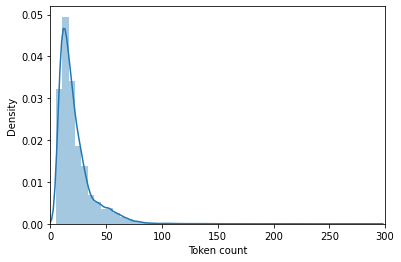

In [9]:
sns.distplot(token_lens)
plt.xlim([0, 300]);
plt.xlabel('Token count');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


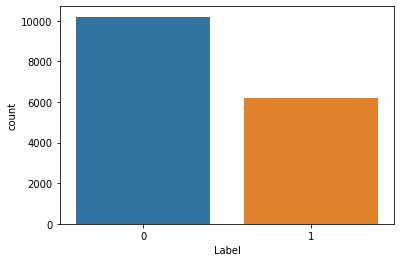

In [10]:
sns.countplot(df.Label)
plt.xlabel('Label');

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train,test_size=0.25, random_state=1)

In [10]:
df_train.shape, df_test.shape, df_val.shape

((9837, 4), (3280, 4), (3279, 4))

In [11]:
MAX_LEN =128

In [12]:
class TheDataset(torch.utils.data.Dataset):

    def __init__(self, tweets,labels, tokenizer):
        self.tweets     = tweets 
        self.labels = labels
        self.tokenizer  = tokenizer
        self.max_len    = MAX_LEN
  
    def __len__(self):
        return len(self.tweets)
  
    def __getitem__(self, index):
        Tweet = str(self.tweets[index])
        Label = self.labels[index]

        encoded_tweet = self.tokenizer.encode_plus(
            Tweet,
            add_special_tokens    = True,
            max_length            = self.max_len,
            return_token_type_ids = False,
            return_attention_mask = True,
            return_tensors        = "pt",
            padding               = "max_length",
            truncation            = True
        )

        return {
            'input_ids': encoded_tweet['input_ids'][0],
            'attention_mask': encoded_tweet['attention_mask'][0],
            'labels': torch.tensor(Label, dtype=torch.long)
        }

In [13]:
df_train.shape, df_test.shape, df_val.shape

((9837, 4), (3280, 4), (3279, 4))

In [14]:
train_set_dataset = TheDataset(
    tweets    = df_train.Tweet.tolist(),
    labels = df_train.Label.tolist(),
    tokenizer  = tokenizer

    
)

In [15]:

valid_set_dataset = TheDataset(
    tweets    = df_val.Tweet.tolist(),
    labels = df_val.Label.tolist(),
    tokenizer  = tokenizer
)

In [16]:
train_set_dataloader = torch.utils.data.DataLoader(
    train_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [17]:

valid_set_dataloader = torch.utils.data.DataLoader(
    valid_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [18]:
test_set_dataset = TheDataset(
    tweets    = df_test.Tweet.tolist(),
    labels = df_test.Label.tolist(),
    tokenizer  = tokenizer
)

In [19]:
test_set_dataloader = torch.utils.data.DataLoader(
    test_set_dataset,
    batch_size  = 1,
    num_workers = 4
)

In [47]:
import wandb

ModuleNotFoundError: ignored

In [31]:
output_dir='./drive/MyDrive/savedmodel_subramanian_wemojis/roberta'

In [32]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, RobertaForSequenceClassification

training_args = TrainingArguments(
    output_dir=output_dir,
          # output directory
    num_train_epochs= 5,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    #per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs/subramanian_wemojis',            # directory for storing logs
    #evaluation_strategy="steps",
    #eval_steps=500,
    logging_steps=100,
    overwrite_output_dir=True,
    save_total_limit=1,
    #load_best_model_at_end = True,
    learning_rate = 1e-5
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [33]:
from transformers import ElectraForSequenceClassification

model= RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=2)
model.resize_token_embeddings(len(tokenizer))

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_set_dataset,         # training dataset
    #eval_dataset=valid_set_dataset,             # evaluation dataset
    tokenizer = tokenizer
)

trainer.train()

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin not found in cache or forc

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

storing https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
creating metadata file for /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
loading weights file https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight'

Step,Training Loss
100,0.603900
200,0.258200
300,0.225700
400,0.207100
500,0.192400
600,0.206400
700,0.162200
800,0.134600
900,0.115600
1000,0.133400


Saving model checkpoint to ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500
Configuration saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500/config.json
Model weights saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500/special_tokens_map.json
added tokens file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-500/added_tokens.json
Saving model checkpoint to ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-1000
Configuration saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-1000/config.json
Model weights saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/checkpoint-1000/pytorch_model.bin
tokenizer 

TrainOutput(global_step=3075, training_loss=0.12429416873590733, metrics={'train_runtime': 771.4515, 'train_samples_per_second': 63.756, 'train_steps_per_second': 3.986, 'total_flos': 3235279314470400.0, 'train_loss': 0.12429416873590733, 'epoch': 5.0})

In [ ]:
mwandb.finish()

train/epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇████
train/learning_rate,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,██▇▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁
train/train_samples_per_second,▁
train/train_steps_per_second,▁
train/epoch,5.0
train/global_step,3420


In [34]:
 trainer.save_model(output_dir + '/roberta_full_subramanian_run1_wemojis')

Saving model checkpoint to ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis
Configuration saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis/config.json
Model weights saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis/pytorch_model.bin
tokenizer config file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis/tokenizer_config.json
Special tokens file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis/special_tokens_map.json
added tokens file saved in ./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis/added_tokens.json


In [6]:
class TransformerEnsemble(nn.Module):
    def __init__(self):
        super().__init__()
        self.model_A =  BertForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_subramanian_wemojis/bert/bert_full_subramanian_run1_wemojis',num_labels=2)
        self.model_B = ElectraForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_subramanian_wemojis/electra/electra_full_subramanian_run1_wemojis',num_labels=2)
        self.model_C = DistilBertForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_subramanian_wemojis/distilbert/distilbert_full_subramanian_run1_wemojis',num_labels=2)
        self.model_D= RobertaForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_subramanian_wemojis/roberta/roberta_full_subramanian_run1_wemojis', num_labels=2)
        self.model_E = XLNetForSequenceClassification.from_pretrained('./drive/MyDrive/savedmodel_subramanian_wemojis/xlnet/xlnet_full_subramanian_run1_wemojis',num_labels=2)
        #self.labels = df3.Label
        #self.pred1,self.pred2,self.pred3,self.pred4,self.pred5 = [],[],[],[],[]
        #self.pred1,self.pred2,self.pred3,self.pred4,self.pred5 = [],[],[],[],[]
        #self.classifier = MLP_Module
        self.pred=[]
    def forward(self, input_ids=None,
    attention_mask=None):
        a_output = self.model_A(input_ids = input_ids,
    attention_mask=attention_mask)
        out_1 = a_output.logits
        out_1 = F.softmax(out_1,dim=-1)
        #out_1 = out_1.cpu().detach().numpy()
        out_1 = out_1[0]
        #out_1= self.pred1.append(out)
        #self.pred1.append(out_1) 
       ## if out==1: 

         ## output_bert = 0
          ##self.prediction.append(output_bert)
        ##else : 
         # output_bert = 1
         # self.prediction.append(output_bert)
        
                          
        b_output = self.model_B(input_ids = input_ids,
    attention_mask=attention_mask)
        out_2 = b_output.logits
        out_2 = F.softmax(out_2,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_2 = out_2.cpu().detach().numpy()
        out_2 = out_2[0]
        #out= int(np.argmax(out)+1)
        #if out==1: 
       # self.pred2.append(out_2)
         # output_electra = 0
          #self.prediction.append(output_electra)
        #else : 
         # output_electra = 1
         # self.prediction.append(output_electra)
         

        c_output = self.model_C(input_ids = input_ids,
    attention_mask=attention_mask)
        out_3 = c_output.logits
        out_3 = F.softmax(out_3,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_3 = out_3.cpu().detach().numpy()
        out_3 = out_3[0]
        #out= int(np.argmax(out)+1)
        #if out==1: 
       # self.pred3.append(out_3)
         # output_distilbert = 0
         # self.prediction.append(output_distilbert)
        #else : 
        #  output_distilbert = 1
         # self.prediction.append(output_distilbert)

       
        d_output = self.model_D(input_ids = input_ids,
    attention_mask=attention_mask)
        out_4 = d_output.logits
        out_4 = F.softmax(out_4,dim=-1)
        #out = F.softmax(out,dim=-1)
       # out = out_4.cpu().detach().numpy()
        out_4 = out_4[0]
       # out= int(np.argmax(out)+1)
       # if out==1: 
        #self.pred4.append(out_4)
        #  output_roberta = 0
        #  self.prediction.append(output_roberta)
        #else : 
         # output_roberta = 1
          #self.prediction.append(output_roberta)

        #self.pred.extend(out_4)
        e_output = self.model_E(input_ids = input_ids,
    attention_mask=attention_mask)
        out_5 = e_output.logits
        out_5 = F.softmax(out_5,dim=-1)
        #out = F.softmax(out,dim=-1)
        #out_5 = out_5.cpu().detach().numpy()
        out_5 = out_5[0]
        #self.pred5.append(out_5)
        #out= int(np.argmax(out)+1)
        #if out==1: 

         # output_xlnet = 0
          #self.prediction.append(output_xlnet)
        #else : 
         # output_xlnet = 1
          #self.prediction.append(output_xlnet)

      #  self.pred.extend(out_5)  
        #concated_output = [self.pred1,self.pred2,self.pred3,self.pred4,self.pred5]
        
        concated_output = torch.cat((out_1, out_2, out_3, out_4,out_5),0)
        #concated_output = list(zip(out_1, out_2,out_3,out_4,out_5))  
        concated_output= concated_output.detach().cpu().numpy()
        concated_output= concated_output.tolist()
        #df2 = pd.DataFrame(concated_output)
        #elf.pred.append(concated_output)
        #self.pred = self.pred[11]
        #for out in concated_output:
         # df2 = pd.DataFrame([out], columns=['neg1','pos1','neg2','pos2','neg3','pos3','neg4','pos4','neg5','pos5'])   
          #new_lst = [list(x) for x in zip(out)]
          #df2= np.column_stack(out)
        #df2= pd.DataFrame(list(map(np.ravel, concated_output)))
        #final_output = self.classifier(concated_output)
        return concated_output

In [20]:
model = TransformerEnsemble()

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

TransformerEnsemble(
  (model_A): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30884, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, 

In [25]:
df7 = pd.DataFrame(columns = range(10))

new_target = []
for d in test_set_dataloader:
  input_ids = d["input_ids"].to(device)
  attention_mask = d["attention_mask"].to(device)
  labels = d["labels"].to(device)
  labels  = labels.detach().cpu().numpy()
  labels =labels.tolist()
  #print(labels)
  new_target.append(labels)
  #print(new_target)
  #flat_list = [item for targets in new_target for item in targets]
  #print(flat_list)
  #targets= targets.tolist()
  #df3 = pd.DataFrame(flat_list)
  #df3.columns=['targets']
  #df3.head()
  outputs = model(input_ids=input_ids,
    attention_mask=attention_mask)
  #print(targets)
  df7=df7.append(pd.Series(outputs),ignore_index=True)
  #df2.head()
df7.columns= ['neg1','pos1','neg2','pos2','neg3','pos3','neg4','pos4','neg5','pos5']
flat_list = [item for labels in new_target for item in labels]
print(flat_list)
df9 = pd.DataFrame(flat_list)
#df3.head()
df10= df7.assign(new_target=flat_list)
#df4= df2.append(df3, ignore_index=True)
  #df4= pd.concat([df2, df3], axis=1, join='inner')
  #df4 = [df2, df3]
  
  #result = pd.concat(df4)
  #df4 = df2.join(pd.Series(targets))
#for pred_list in outputs:
 #   df2 = df2.append(pd.Series(pred_list), ignore_index=True)

df10.head(50)

[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

,neg1,pos1,neg2,pos2,neg3,pos3,neg4,pos4,neg5,pos5,new_target
0,0.999139,0.000861,0.997691,0.002309,0.998803,0.001197,0.000225,0.999775,0.000478,0.999522,0
1,0.000854,0.999146,0.000802,0.999198,0.000107,0.999892,0.873657,0.126343,0.160863,0.839137,1
2,0.999801,0.000199,0.999157,0.000843,0.999073,0.000927,0.995082,0.004918,0.000597,0.999403,0
3,0.000245,0.999755,0.000529,0.999471,0.000065,0.999935,0.007882,0.992118,0.997285,0.002715,1
4,0.000247,0.999753,0.000545,0.999455,0.000065,0.999935,0.000858,0.999142,0.000297,0.999703,1
5,0.999789,0.000211,0.999424,0.000576,0.999074,0.000926,0.994085,0.005915,0.996545,0.003455,0
6,0.000252,0.999748,0.000522,0.999478,0.000065,0.999935,0.000438,0.999562,0.000176,0.999824,1
7,0.000285,0.999715,0.000566,0.999434,0.000066,0.999934,0.091081,0.908918,0.003725,0.996275,1
8,0.999793,0.000207,0.999419,0.000581,0.999066,0.000934,0.621859,0.378141,0.997461,0.002539,0
9,0.999753,0.000247,0.999398,0.000602,0.999073,0.000927,0.999729,0.000271,0.999555,0.000445,0


In [26]:
 df10.to_csv("./drive/MyDrive/savedmodel_subramanian_wemojis/testset_afinetuning_subramanian_wemojis.csv",index= False)